In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t
import warnings
warnings.simplefilter('ignore')
sns.set()
stud_math = pd.read_csv('stud_math.csv')

# Общий анализ датафрейма

In [2]:
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
# Процент пропусков в столбике
for i in range(0, 30):
    print('Gap data', stud_math.columns[i], ':',
          round((stud_math.iloc[:, i].isnull().sum()/len(stud_math.iloc[:, i]))*100, 2), '%')

Gap data school : 0.0 %
Gap data sex : 0.0 %
Gap data age : 0.0 %
Gap data address : 4.3 %
Gap data famsize : 6.84 %
Gap data Pstatus : 11.39 %
Gap data Medu : 0.76 %
Gap data Fedu : 6.08 %
Gap data Mjob : 4.81 %
Gap data Fjob : 9.11 %
Gap data reason : 4.3 %
Gap data guardian : 7.85 %
Gap data traveltime : 7.09 %
Gap data studytime : 1.77 %
Gap data failures : 5.57 %
Gap data schoolsup : 2.28 %
Gap data famsup : 9.87 %
Gap data paid : 10.13 %
Gap data activities : 3.54 %
Gap data nursery : 4.05 %
Gap data studytime, granular : 1.77 %
Gap data higher : 5.06 %
Gap data internet : 8.61 %
Gap data romantic : 7.85 %
Gap data famrel : 6.84 %
Gap data freetime : 2.78 %
Gap data goout : 2.03 %
Gap data health : 3.8 %
Gap data absences : 3.04 %
Gap data score : 1.52 %


In [5]:
# Название определенного столбца с сколичеством данных в нем
for i in range(0, 30):
    print(stud_math.columns[i], ':')
    print(stud_math.iloc[:, i].value_counts())

school :
GP    349
MS     46
Name: school, dtype: int64
sex :
F    208
M    187
Name: sex, dtype: int64
age :
16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64
address :
U    295
R     83
Name: address, dtype: int64
famsize :
GT3    261
LE3    107
Name: famsize, dtype: int64
Pstatus :
T    314
A     36
Name: Pstatus, dtype: int64
Medu :
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64
Fedu :
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64
Mjob :
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
Fjob :
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
reason :
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
guardian :
mother    250
father     86
other      28
Name: guardian, dtype: int64
traveltim

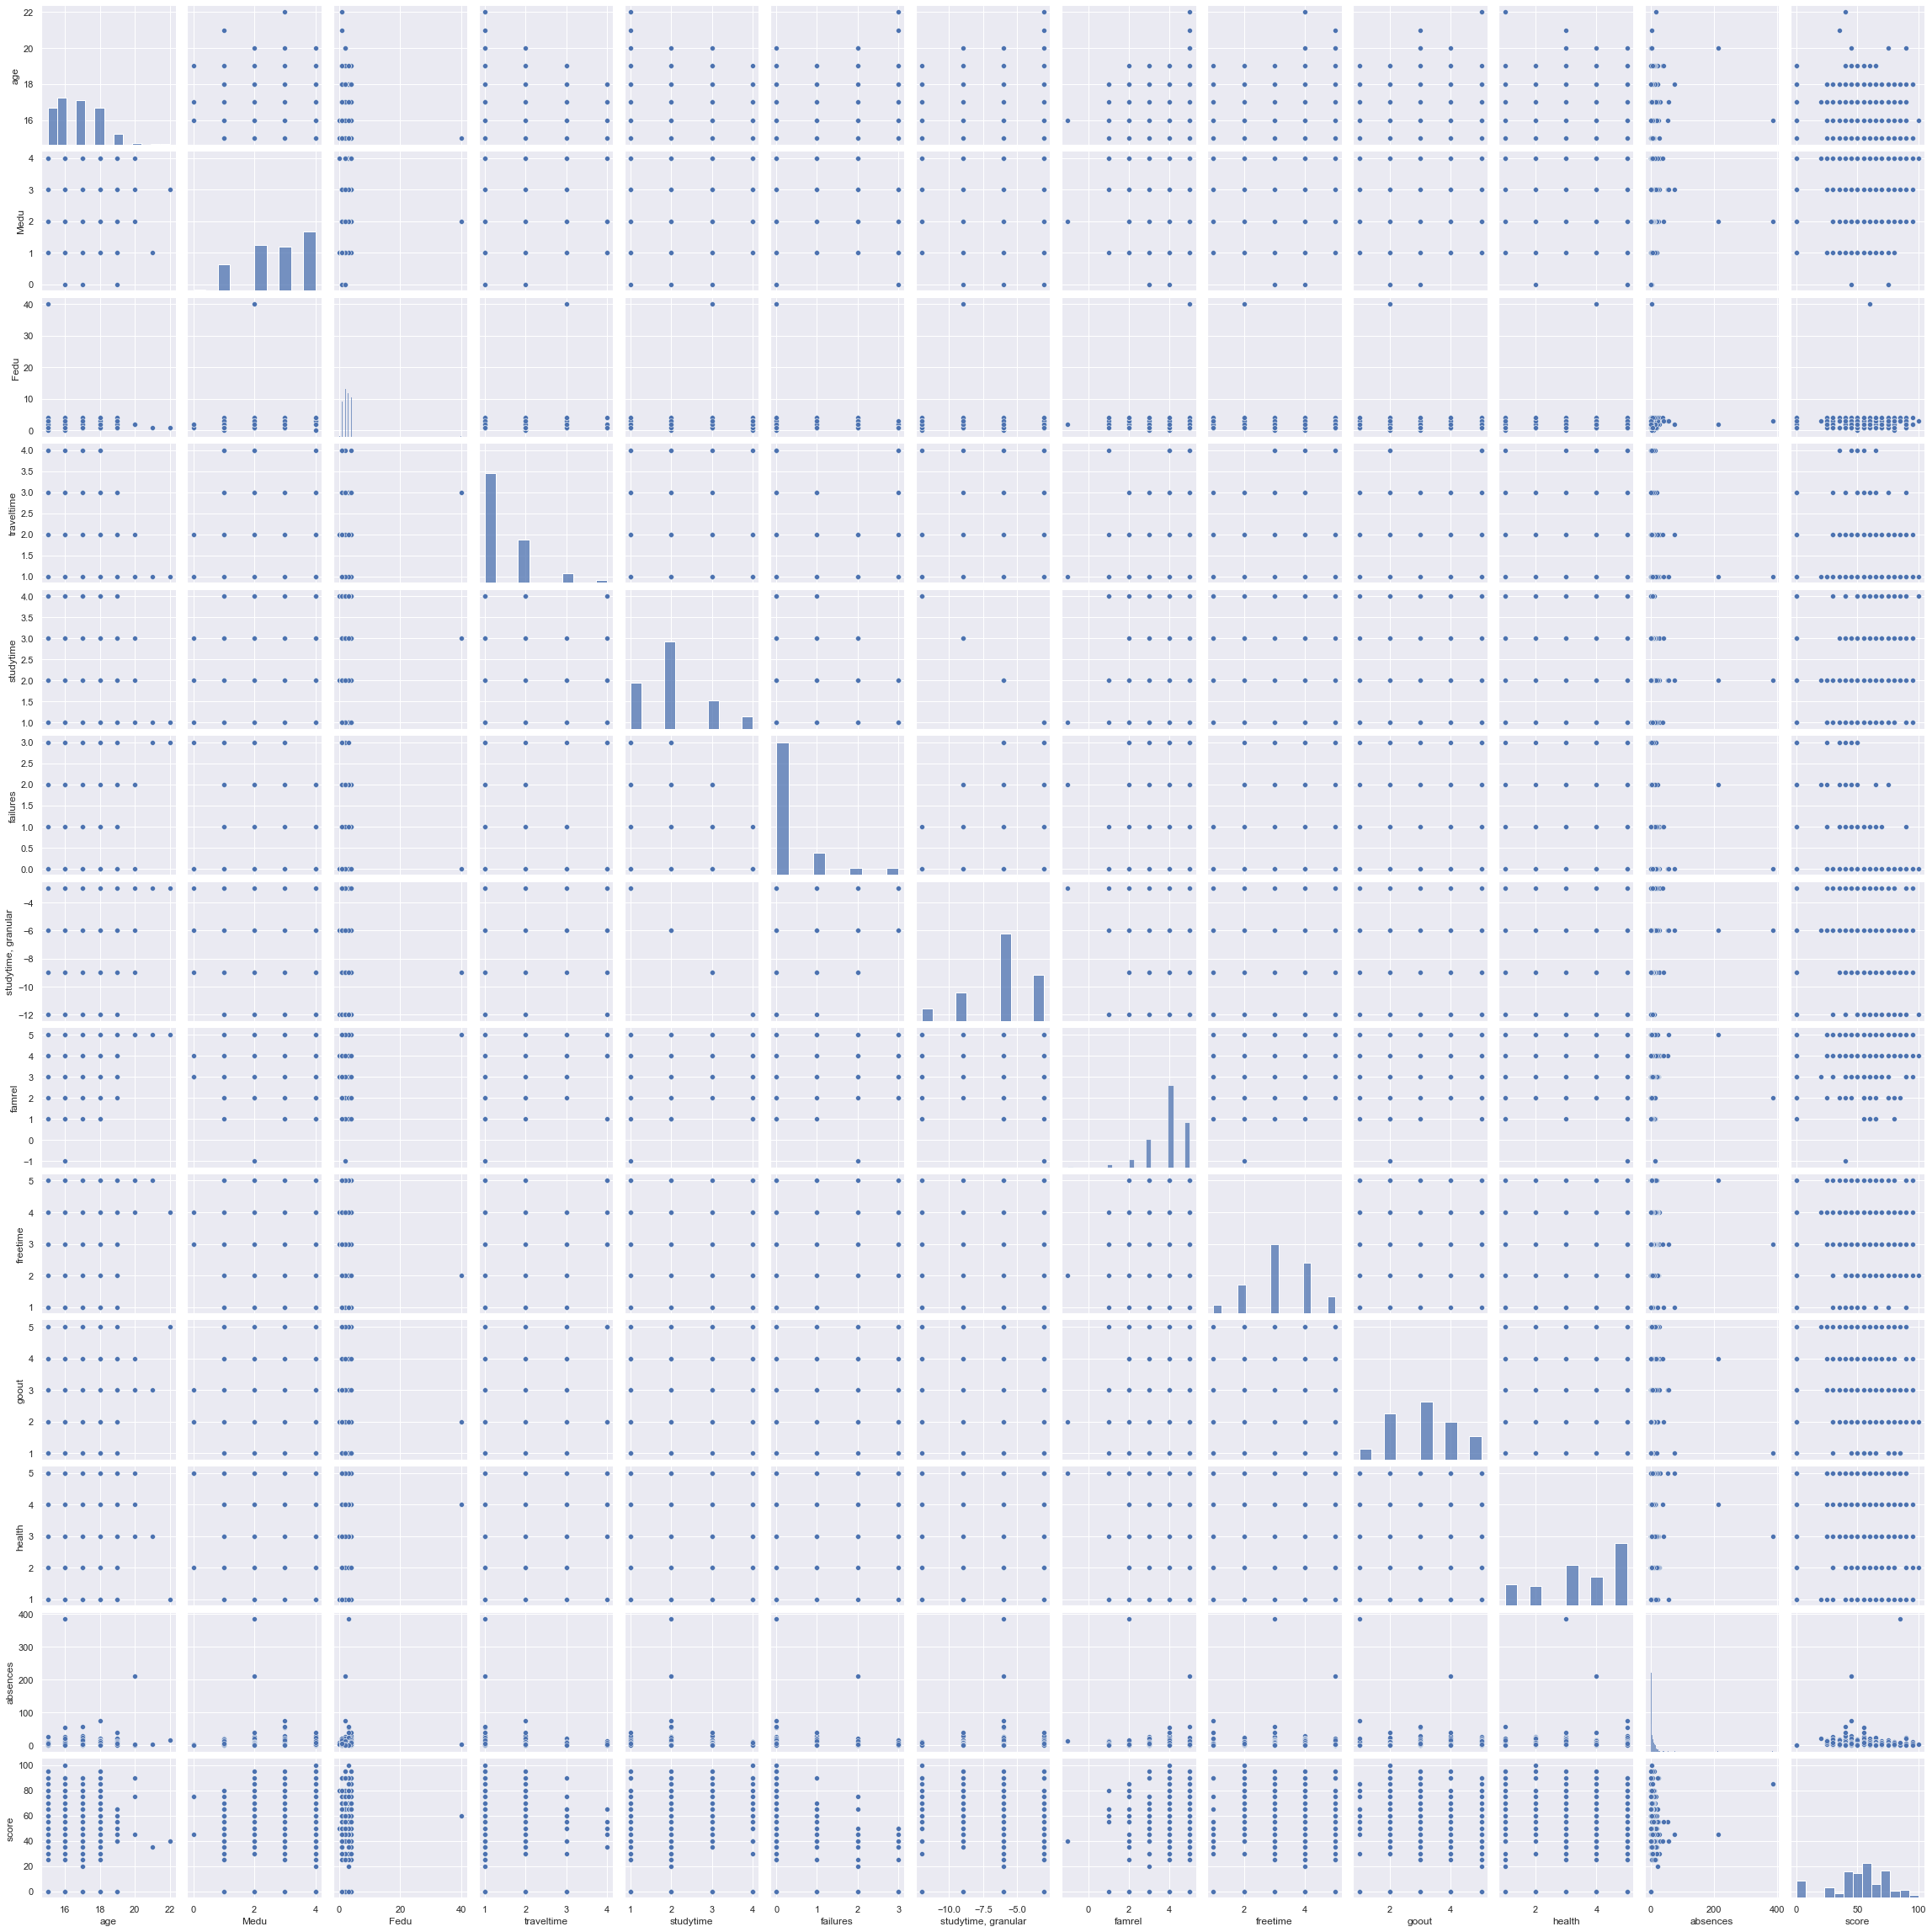

In [6]:
sns.pairplot(data=stud_math)

In [7]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


## Работа с колонкой school

### Работа с графиком

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object


<AxesSubplot:>

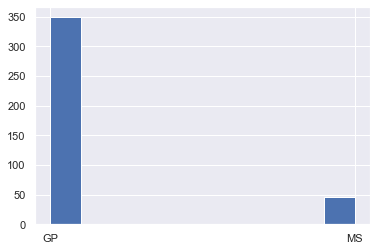

In [8]:
print(stud_math.school.describe())
stud_math.school.hist()

### Возможно в школах MS меньше препадают математику.А представители GP школ больше говорит о том,что изучение акцентируется на математику

## Работа с колонкой sex

### Работа с графиком

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object


<AxesSubplot:>

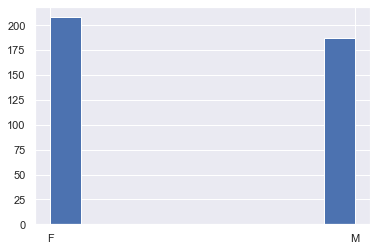

In [198]:
print(stud_math.sex.describe())
stud_math.sex.hist()

### Это говорит о том,что возможно представители женского пола больше изучают данную область науки

## Работа с колонкой age

### Работа с графиком

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


<AxesSubplot:>

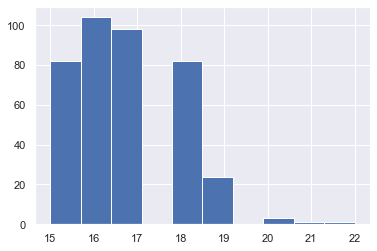

In [9]:
# График с выбросами
print(stud_math.age.describe())
stud_math.age.hist(bins=10)

In [10]:
# Нахождение 25 и 75 перцентлья и границ выбрасов

perc_25 = stud_math.age.quantile(0.25)
perc_75 = stud_math.age.quantile(0.75)
IQR = perc_75 - perc_25

print('25 перцентель:', perc_25)
print('75 перцентель:', perc_75)
print('Границы выбрасов:', [perc_25 - 1.5*IQR, perc_75 + 1.5*IQR])

25 перцентель: 16.0
75 перцентель: 18.0
Границы выбрасов: [13.0, 21.0]


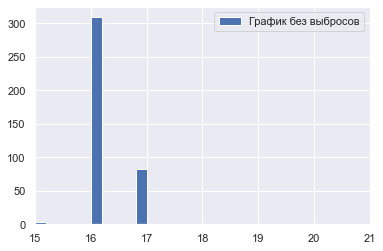

In [192]:
# График без выбрасов


stud_math.age.loc[stud_math.age].hist(label='График без выбросов')
plt.xlim(15, 21)
plt.legend()

### Возможно такие выбросы - это те люди,которые продолжели изучать математику их очень мальнькое   кол-во, что показывает не особое заинтересованность данной области науки(то что за 75 перценталь),а другие выбросов не присудствует (то что за 25 перценталь).Мало людей возрасте 15 лет изучают математику.Доменирующий показатель у людей 16 лет.

## Работа с колонкой address

### Заполнение пропусков

In [13]:
stud_math.address = stud_math.address.astype(
    str).apply(lambda x: None if x.strip() == '' else x)
stud_math.address.value_counts()

U      295
R       83
nan     17
Name: address, dtype: int64

In [14]:
stud_math.address = stud_math.address.replace('nan', 'U')

In [15]:
stud_math.address.value_counts()

U    312
R     83
Name: address, dtype: int64

### Работа с графиком

count     395
unique      2
top         U
freq      312
Name: address, dtype: object


<AxesSubplot:>

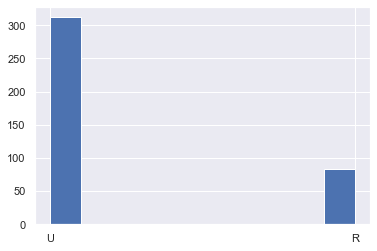

In [16]:
print(stud_math.address.describe())
stud_math.address.hist()

### Городские больше дают акцент на изучении данной области науки.Нежели за городом.

## Работа с колонкой  famsize

### Заполнение пропусков

In [17]:
stud_math.famsize = stud_math.famsize.astype(
    str).apply(lambda x: None if x.strip() == '' else x)
stud_math.famsize.value_counts()

GT3    261
LE3    107
nan     27
Name: famsize, dtype: int64

In [18]:
stud_math.famsize = stud_math.famsize.replace('nan', 'GT3')

In [19]:
stud_math.famsize.value_counts()

GT3    288
LE3    107
Name: famsize, dtype: int64

### Работа с графиком

count     395
unique      2
top       GT3
freq      288
Name: famsize, dtype: object


<AxesSubplot:>

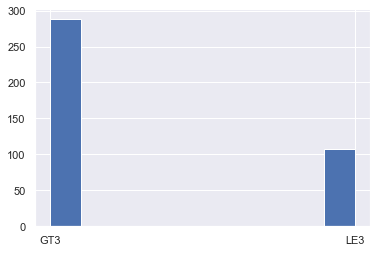

In [20]:
print(stud_math.famsize.describe())
stud_math.famsize.hist()

### В основном люди,которые изучают математику больше 3 человек в семье.

## Работа с колонкой Pstatus

### Заполнение пропусков

In [21]:
stud_math.Pstatus = stud_math.Pstatus.astype(
    str).apply(lambda x: None if x.strip() == '' else x)

In [22]:
stud_math.Pstatus.value_counts()

T      314
nan     45
A       36
Name: Pstatus, dtype: int64

In [23]:
stud_math.Pstatus = stud_math.Pstatus.replace('nan', 'T')

In [24]:
stud_math.Pstatus.value_counts()

T    359
A     36
Name: Pstatus, dtype: int64

### Работа с графиком

count     395
unique      2
top         T
freq      359
Name: Pstatus, dtype: object


<AxesSubplot:>

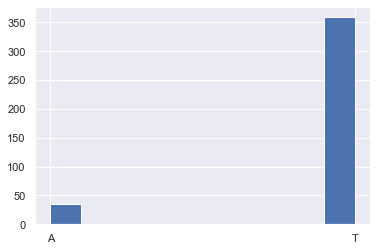

In [25]:
print(stud_math.Pstatus.describe())
stud_math.Pstatus.hist()

### Люди живущие раздельно их гороздо меньше изучают математику нежели вместе. 

## Работа с колонкой Medu

### Заполнение пропусков

In [26]:
stud_math.Medu = stud_math.Medu.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [27]:
stud_math.Medu.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
nan      3
Name: Medu, dtype: int64

In [28]:
stud_math.Medu = stud_math.Medu.replace('nan', str(stud_math.Medu.median()))

In [29]:
stud_math.Medu.value_counts()

4.0    131
2.0    102
3.0    100
1.0     59
0.0      3
Name: Medu, dtype: int64

### Работа с графиком

count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


<AxesSubplot:>

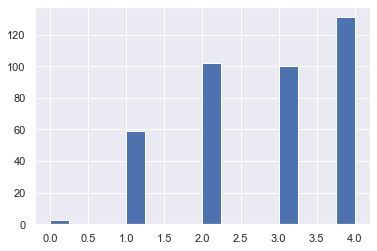

In [33]:
# График с выбрасами
stud_math.Medu = stud_math.Medu.astype('float64')
print(stud_math.Medu.describe())
stud_math.Medu.hist(bins=16)

In [34]:
# Нахождение 25 и 75 перцентлья и границ выбрасов

perc_25 = stud_math.Medu.quantile(0.25)
perc_75 = stud_math.Medu.quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: 2.0
75-ый перцентль: 4.0
Границы выбрасов: [-1.0, 7.0]


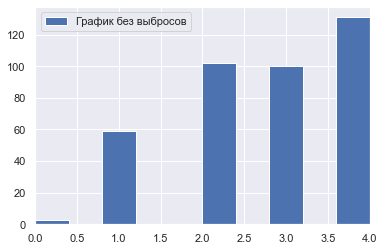

In [200]:
# График без выбрасов
stud_math.Medu.hist(label='График без выбросов')
plt.xlim(0, 4)
plt.legend()

### Выбросов не присудствует.Малое кол-во мам не имеют образование.Доменирующий показатель у людей с высшим.

## Работа с колонкой Fedu

### Заполнение пропусков

In [36]:
stud_math.Fedu = stud_math.Fedu.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [37]:
stud_math.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
nan      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [38]:
stud_math.Fedu = stud_math.Fedu.replace('nan', str(stud_math.Fedu.median()))

In [39]:
stud_math.Fedu.value_counts()

2.0     130
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

### Работа с графиком

count    395.000000
mean       2.577215
std        2.164782
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64


<AxesSubplot:>

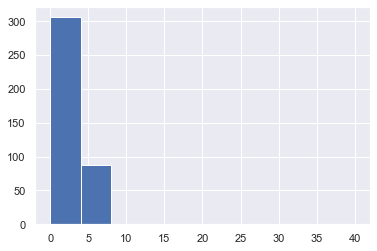

In [41]:
# Нахождение 25 и 75 перцентлья и границ выбрасов
stud_math.Fedu = stud_math.Fedu.astype('float64')
print(stud_math.Fedu.describe())
stud_math.Fedu.hist()

In [42]:
# Нахождение выбрасов

perc_25 = stud_math.Fedu.quantile(0.25)
perc_75 = stud_math.Fedu.quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: 2.0
75-ый перцентль: 3.0
Границы выбрасов: [0.5, 4.5]


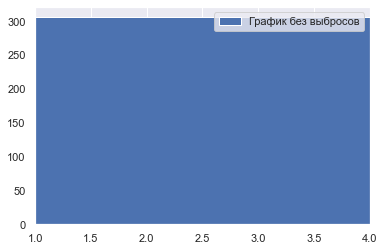

In [194]:
# График без выбрасов
stud_math.Fedu.hist(label='График без выбросов')
plt.xlim(1, 4)
plt.legend()

### Выбросы связаны с не корекным вводом данных,так как оценка даннных оценивается с 1-4(то что за 75 перцентль),то что за 25 перцентль выходит их очень малое кол-во в основном,поэтому они считаются выбросами.Показатель в образование отцов у всех равный.

## Работа с колонкой Mjob

### Заполнение пропусков

In [45]:
stud_math.Mjob = stud_math.Mjob.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [46]:
stud_math.Mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
nan          19
Name: Mjob, dtype: int64

In [47]:
stud_math.Mjob = stud_math.Mjob.replace('nan', 'other')

In [48]:
stud_math.Mjob.value_counts()

other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

### Работа с графиком

count       395
unique        5
top       other
freq        152
Name: Mjob, dtype: object


<AxesSubplot:>

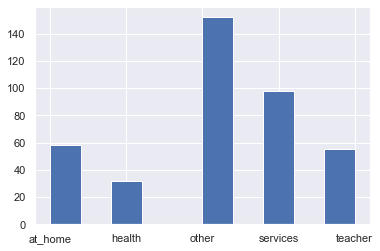

In [49]:
print(stud_math.Mjob.describe())
stud_math.Mjob.hist()

### В основном мамы детей работают в других отраслях.Малую часть работающих преставляют те,которые работают в сфере медицины

## Работа с колонкой Fjob

### Заполнение пропусков

In [50]:
stud_math.Fjob = stud_math.Fjob.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [51]:
stud_math.Fjob.value_counts()

other       197
services    102
nan          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [52]:
stud_math.Fjob = stud_math.Fjob.replace('nan', 'other')

In [53]:
stud_math.Fjob.value_counts()

other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

### Работа с графиком

count       395
unique        5
top       other
freq        233
Name: Fjob, dtype: object


<AxesSubplot:>

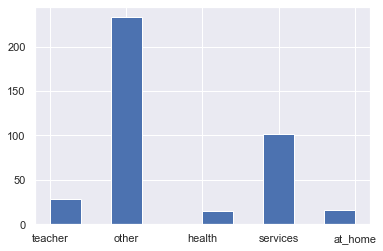

In [54]:
print(stud_math.Fjob.describe())
stud_math.Fjob.hist()

### В основном отцы детей работают в других отраслях.Малую часть работающих преставляют те,которые работают в сфере здравоохранения и безработные.

## Работа с колонкой reason

### Заполнение пропусков

In [55]:
stud_math.reason = stud_math.reason.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [56]:
stud_math.reason.value_counts()

course        137
home          104
reputation    103
other          34
nan            17
Name: reason, dtype: int64

In [57]:
stud_math.reason = stud_math.reason.replace('nan', 'course')

In [58]:
stud_math.reason.value_counts()

course        154
home          104
reputation    103
other          34
Name: reason, dtype: int64

### Работа с графиком

count        395
unique         4
top       course
freq         154
Name: reason, dtype: object


<AxesSubplot:>

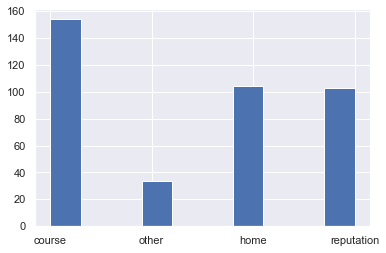

In [59]:
print(stud_math.reason.describe())
stud_math.reason.hist()

### В основном родители выбирают школу в связи уровня образования.Причины выбора по другим ситуациям минимальная.

## Работа с колонкой guardian

### Заполнение пропусков

In [60]:
stud_math.guardian = stud_math.guardian.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [61]:
stud_math.guardian.value_counts()

mother    250
father     86
nan        31
other      28
Name: guardian, dtype: int64

In [62]:
stud_math.guardian = stud_math.guardian.replace('nan', 'mother')

In [63]:
stud_math.guardian.value_counts()

mother    281
father     86
other      28
Name: guardian, dtype: int64

### Работа с графиком

count        395
unique         3
top       mother
freq         281
Name: guardian, dtype: object


<AxesSubplot:>

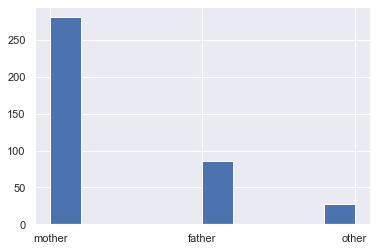

In [64]:
print(stud_math.guardian.describe())
stud_math.guardian.hist()

### В основном опекуном является мама.Минимальную часть составляют другие люди.

## Работа с колонкой traveltime

### Заполнение пропусков

In [65]:
stud_math.traveltime = stud_math.traveltime.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [66]:
stud_math.traveltime.value_counts()

1.0    242
2.0     96
nan     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [67]:
stud_math.traveltime = stud_math.traveltime.replace(
    'nan', str(stud_math.traveltime.median()))

In [68]:
stud_math.traveltime.value_counts()

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

### Работа с графиком

count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


<AxesSubplot:>

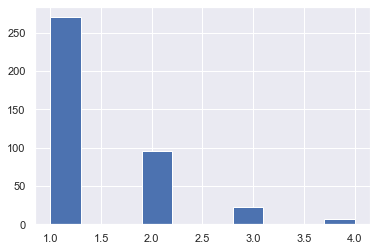

In [70]:
stud_math.traveltime = stud_math.traveltime.astype('float64')
print(stud_math.traveltime.describe())
stud_math.traveltime.hist()

In [71]:
# Нахождение выбрасов

perc_25 = stud_math.traveltime.quantile(0.25)
perc_75 = stud_math.traveltime.quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: 1.0
75-ый перцентль: 2.0
Границы выбрасов: [-0.5, 3.5]


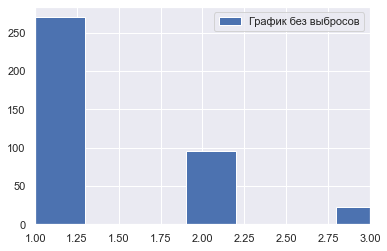

In [195]:
# График без выбрасов
stud_math.traveltime.hist(label='График без выбросов')
plt.xlim(1, 3)
plt.legend()

### Выбросами оказазались люди,которые больше часа добираются до школы.Доменирующей частей являются люди,которые добераются за 15 минут.Мало людей добераются за 30-60 минут.

## Работа с колонкой studytime

### Заполнение пропусков

In [77]:
stud_math.studytime = stud_math.studytime.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [78]:
stud_math.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
nan      7
Name: studytime, dtype: int64

In [79]:
stud_math.studytime = stud_math.studytime.replace(
    'nan', str(stud_math.studytime.median()))

In [80]:
stud_math.studytime.value_counts()

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

### Работа с графиком

count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


<AxesSubplot:>

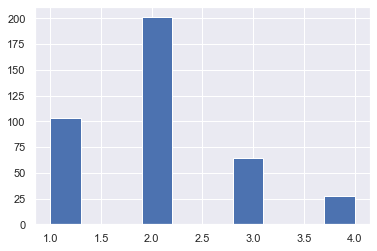

In [81]:
stud_math.studytime = stud_math.studytime.astype('float64')
print(stud_math.studytime.describe())
stud_math.studytime.hist()

In [82]:
# Нахождение выбрасов

perc_25 = stud_math.studytime.quantile(0.25)
perc_75 = stud_math.studytime.quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: 1.0
75-ый перцентль: 2.0
Границы выбрасов: [-0.5, 3.5]


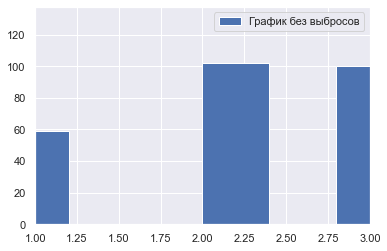

In [190]:
# График без выбрасов
stud_math.Medu.hist(label='График без выбросов')
plt.xlim(1, 3)
plt.legend()

### Выбросами оказались,те кто учится больше 10 часов в неделю.Остальные в большей степени учится 2-5 часов.Малая часть занимается меньше 2 часов в неделю.

## Работа с колонкой failures

### Заполнение пропусков

In [84]:
stud_math.failures = stud_math.failures.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [85]:
stud_math.failures.value_counts()

0.0    293
1.0     49
nan     22
2.0     16
3.0     15
Name: failures, dtype: int64

In [86]:
stud_math.failures = stud_math.failures.replace(
    'nan', str(stud_math.failures.median()))

In [87]:
stud_math.studytime.value_counts()

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

### Работа с графиком

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


<AxesSubplot:>

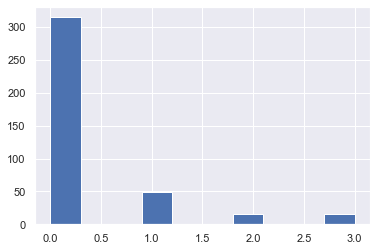

In [88]:
stud_math.failures = stud_math.failures.astype('float64')
print(stud_math.failures.describe())
stud_math.failures.hist()

In [90]:
# Нахождение выбрасов

perc_25 = stud_math.failures.quantile(0.25)
perc_75 = stud_math.failures.quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: 0.0
75-ый перцентль: 0.0
Границы выбрасов: [0.0, 0.0]


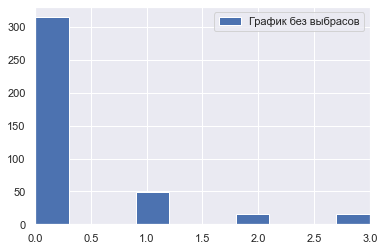

In [191]:
# График без выбрасов
stud_math.failures.hist(label='График без выбрасов')
plt.xlim(0, 3)
plt.legend()

### В основном их нет.Минимальное кол-во это 3.

## Работа с колонкой schoolsup

### Заполнение пропусков

In [92]:
stud_math.schoolsup = stud_math.schoolsup.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [93]:
stud_math.schoolsup.value_counts()

no     335
yes     51
nan      9
Name: schoolsup, dtype: int64

In [94]:
stud_math.schoolsup = stud_math.schoolsup.replace('nan', 'no')

In [95]:
stud_math.schoolsup.value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

### Работа с графиком

count     395
unique      2
top        no
freq      344
Name: schoolsup, dtype: object


<AxesSubplot:>

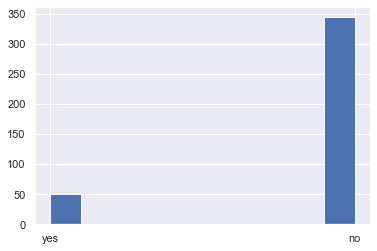

In [96]:
print(stud_math.schoolsup.describe())
stud_math.schoolsup.hist()

### Образовательной поддержки в основном нет.

## Работа с колонкой famsup

### Заполнение пропусков

In [97]:
stud_math.famsup = stud_math.famsup.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [98]:
stud_math.famsup.value_counts()

yes    219
no     137
nan     39
Name: famsup, dtype: int64

In [99]:
stud_math.famsup = stud_math.famsup.replace('nan', 'yes')

In [100]:
stud_math.famsup.value_counts()

yes    258
no     137
Name: famsup, dtype: int64

### Работа с графиком

count     395
unique      2
top       yes
freq      258
Name: famsup, dtype: object


<AxesSubplot:>

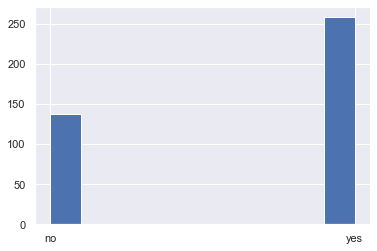

In [101]:
print(stud_math.famsup.describe())
stud_math.famsup.hist()

### Больше пресудствует поддержка семейная.

## Работа с колонкой paid

### Заполнение пропусков

In [102]:
stud_math.paid = stud_math.paid.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [103]:
stud_math.paid.value_counts()

no     200
yes    155
nan     40
Name: paid, dtype: int64

In [104]:
stud_math.paid = stud_math.paid.replace('nan', 'no')

In [105]:
stud_math.paid.value_counts()

no     240
yes    155
Name: paid, dtype: int64

### Работа с графиком

count     395
unique      2
top        no
freq      240
Name: paid, dtype: object


<AxesSubplot:>

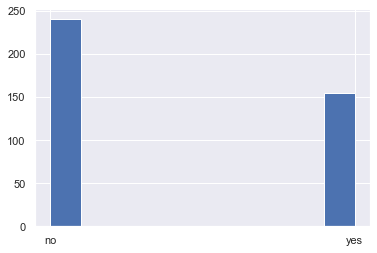

In [106]:
print(stud_math.paid.describe())
stud_math.paid.hist()

### Доп занятий за обучение по математике в основном не платят.

## Работа с колонкой activities

### Заполнение пропусков

In [107]:
stud_math.activities = stud_math.activities.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [108]:
stud_math.activities.value_counts()

yes    195
no     186
nan     14
Name: activities, dtype: int64

In [109]:
stud_math.activities = stud_math.activities.replace('nan', 'yes')

In [110]:
stud_math.activities.value_counts()

yes    209
no     186
Name: activities, dtype: int64

### Работа с графиком

count     395
unique      2
top       yes
freq      209
Name: activities, dtype: object


<AxesSubplot:>

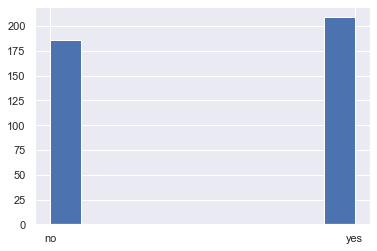

In [111]:
print(stud_math.activities.describe())
stud_math.activities.hist()

### Доп занятия присудствуют у обучающихся

## Работа с колонкой nursery

### Заполнение пропусков

In [112]:
stud_math.nursery = stud_math.nursery.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [113]:
stud_math.nursery.value_counts()

yes    300
no      79
nan     16
Name: nursery, dtype: int64

In [114]:
stud_math.nursery = stud_math.nursery.replace('nan', 'yes')

In [115]:
stud_math.nursery.value_counts()

yes    316
no      79
Name: nursery, dtype: int64

### Работа с графиком

count     395
unique      2
top       yes
freq      316
Name: nursery, dtype: object


<AxesSubplot:>

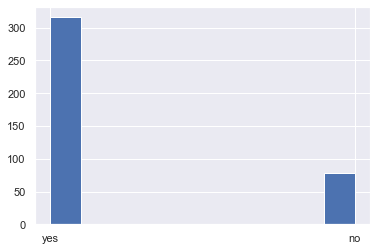

In [116]:
print(stud_math.nursery.describe())
stud_math.nursery.hist()

### В основном дети посещали детские сады

## Работа с колонкой studytime, granular

### Заполнение пропусков

In [117]:
stud_math['studytime, granular'] = stud_math['studytime, granular'].astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [118]:
stud_math['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
nan        7
Name: studytime, granular, dtype: int64

In [119]:
stud_math['studytime, granular'] = stud_math['studytime, granular'].replace(
    'nan', str(stud_math['studytime, granular'].median()))

In [120]:
stud_math['studytime, granular'].value_counts()

-6.0     201
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

### Работа с графиком

count    395.000000
mean      -6.113924
std        2.503740
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64


<AxesSubplot:>

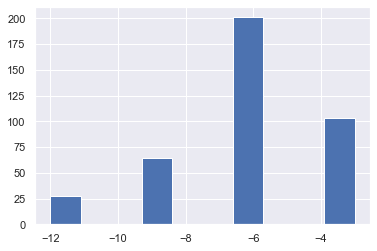

In [121]:
stud_math['studytime, granular'] = stud_math['studytime, granular'].astype(
    'float64')
print(stud_math['studytime, granular'].describe())
stud_math['studytime, granular'].hist()

In [122]:
# Нахождение выбрасов

perc_25 = stud_math['studytime, granular'].quantile(0.25)
perc_75 = stud_math['studytime, granular'].quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: -6.0
75-ый перцентль: -3.0
Границы выбрасов: [-10.5, 1.5]


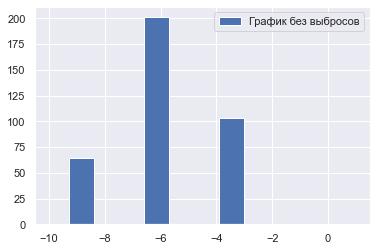

In [196]:
# График без выбрасов
stud_math['studytime, granular'].hist(label='График без выбросов')
plt.xlim(-10.5, 1.5)
plt.legend()

## Работа с колонкой higher

### Заполнение пропусков

In [124]:
stud_math.higher = stud_math.higher.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [125]:
stud_math.higher.value_counts()

yes    356
nan     20
no      19
Name: higher, dtype: int64

In [126]:
stud_math.higher = stud_math.higher.replace(
    'nan', 'yes')

In [127]:
stud_math.higher.value_counts()

yes    376
no      19
Name: higher, dtype: int64

### Работа с графиком

count     395
unique      2
top       yes
freq      376
Name: higher, dtype: object


<AxesSubplot:>

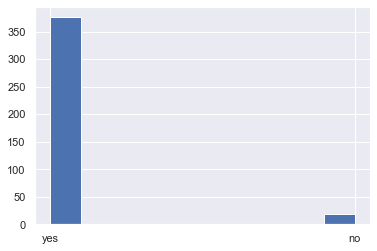

In [128]:
print(stud_math.higher.describe())
stud_math.higher.hist()

### Большинство хотят получить высшие образование

## Работа с колонкой internet

### Заполнение пропусков

In [129]:
stud_math.internet = stud_math.internet.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [130]:
stud_math.internet.value_counts()

yes    305
no      56
nan     34
Name: internet, dtype: int64

In [131]:
stud_math.internet = stud_math.internet.replace(
    'nan', 'yes')

In [132]:
stud_math.internet.value_counts()

yes    339
no      56
Name: internet, dtype: int64

### Работа с графиком

count     395
unique      2
top       yes
freq      339
Name: internet, dtype: object


<AxesSubplot:>

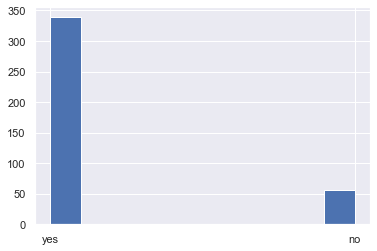

In [133]:
print(stud_math.internet.describe())
stud_math.internet.hist()

### Большинства есть интернет

## Работа с колонкой romantic

### Заполнение пропусков

In [134]:
stud_math.romantic = stud_math.romantic.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [135]:
stud_math.romantic.value_counts()

no     240
yes    124
nan     31
Name: romantic, dtype: int64

In [136]:
stud_math.romantic = stud_math.romantic.replace(
    'nan', 'no')

In [137]:
stud_math.romantic.value_counts()

no     271
yes    124
Name: romantic, dtype: int64

### Работа с графиком

count     395
unique      2
top        no
freq      271
Name: romantic, dtype: object


<AxesSubplot:>

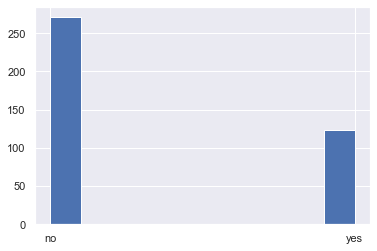

In [138]:
print(stud_math.romantic.describe())
stud_math.romantic.hist()

### Большинство не состоят в романтических отношениях

## Работа с колонкой famrel

### Заполнение пропусков

In [139]:
stud_math.famrel = stud_math.famrel.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [140]:
stud_math.famrel.value_counts()

4.0     182
5.0      99
3.0      62
nan      27
2.0      17
1.0       7
-1.0      1
Name: famrel, dtype: int64

In [141]:
stud_math.famrel = stud_math.famrel.replace(
    'nan', str(stud_math.famrel.median()))

In [142]:
stud_math.famrel.value_counts()

4.0     209
5.0      99
3.0      62
2.0      17
1.0       7
-1.0      1
Name: famrel, dtype: int64

### Работа с графиком

count    395.000000
mean       3.941772
std        0.895081
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64


<AxesSubplot:>

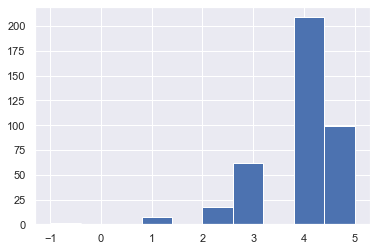

In [143]:
stud_math.famrel = stud_math.famrel.astype('float64')
print(stud_math.famrel.describe())
stud_math.famrel.hist()

In [144]:
# Нахождение выбрасов

perc_25 = stud_math.famrel.quantile(0.25)
perc_75 = stud_math.famrel.quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: 4.0
75-ый перцентль: 4.5
Границы выбрасов: [3.25, 5.25]


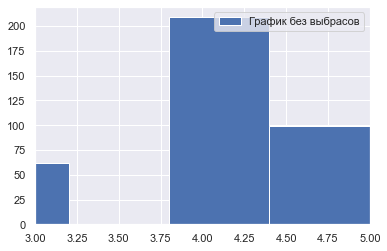

In [145]:
# График без выбрасов
stud_math.famrel.hist(label='График без выбрасов')
plt.xlim(3, 5)
plt.legend()

### В основном родители детей состоят в отличных и хороших отношениях

## Работа с колонкой freetime

### Заполнение пропусков

In [146]:
stud_math.freetime = stud_math.freetime.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [147]:
stud_math.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
nan     11
Name: freetime, dtype: int64

In [148]:
stud_math.freetime = stud_math.freetime.replace(
    'nan', str(stud_math.freetime.median()))

In [149]:
stud_math.freetime.value_counts()

3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

### Работа с графиком

count    395.000000
mean       3.225316
std        0.980711
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


<AxesSubplot:>

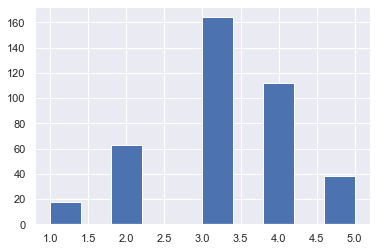

In [150]:
stud_math.freetime = stud_math.freetime.astype('float64')
print(stud_math.freetime.describe())
stud_math.freetime.hist()

In [151]:
# Нахождение выбрасов

perc_25 = stud_math.freetime.quantile(0.25)
perc_75 = stud_math.freetime.quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: 3.0
75-ый перцентль: 4.0
Границы выбрасов: [1.5, 5.5]


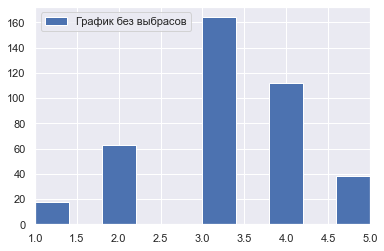

In [153]:
# График без выбрасов
stud_math.freetime.hist(label='График без выбрасов')
plt.xlim(1, 5)
plt.legend()

### Большая часть показывает,что у детей нормально хватает свободного времяни.Малая часть имеет очень много свободного времяни

## Работа с колонкой goout

### Заполнение пропусков

In [154]:
stud_math.goout = stud_math.goout.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [155]:
stud_math.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
nan      8
Name: goout, dtype: int64

In [156]:
stud_math.goout = stud_math.goout.replace(
    'nan', str(stud_math.goout.median()))

In [157]:
stud_math.goout.value_counts()

3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

### Работа с графиком

count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


<AxesSubplot:>

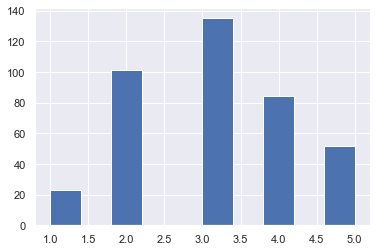

In [158]:
stud_math.goout = stud_math.goout.astype('float64')
print(stud_math.goout.describe())
stud_math.goout.hist()

In [159]:
# Нахождение выбрасов

perc_25 = stud_math.goout.quantile(0.25)
perc_75 = stud_math.goout.quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: 2.0
75-ый перцентль: 4.0
Границы выбрасов: [-1.0, 7.0]


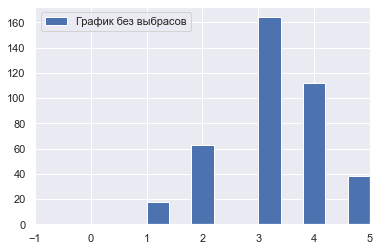

In [160]:
# График без выбрасов
stud_math.freetime.hist(label='График без выбрасов')
plt.xlim(-1.0, 5.0)
plt.legend()

### В основном времяни с друзями проводят нормально.Малая часть не проводит времяни вообще или очень мало.

## Работа с колонкой health

### Заполнение пропусков

In [161]:
stud_math.health = stud_math.health.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [162]:
stud_math.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
nan     15
Name: health, dtype: int64

In [163]:
stud_math.health = stud_math.health.replace(
    'nan', str(stud_math.health.median()))

In [164]:
stud_math.health.value_counts()

5.0    138
3.0     89
4.0     78
1.0     47
2.0     43
Name: health, dtype: int64

### Работа с графиком

count    395.000000
mean       3.549367
std        1.372118
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


<AxesSubplot:>

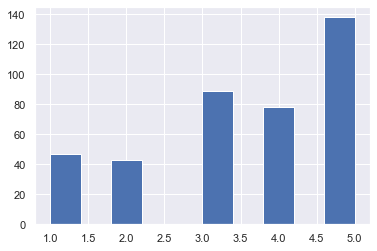

In [165]:
stud_math.health = stud_math.health.astype('float64')
print(stud_math.health.describe())
stud_math.health.hist()

In [166]:
# Нахождение выбрасов

perc_25 = stud_math.health.quantile(0.25)
perc_75 = stud_math.health.quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: 3.0
75-ый перцентль: 5.0
Границы выбрасов: [0.0, 8.0]


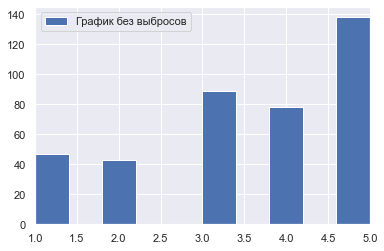

In [170]:
# График без выбрасов
stud_math.health.hist(label='График без выбросов')
plt.xlim(1, 5.0)
plt.legend()

### В основном здоровье детей отличное.Малая часть имеет плохое здоровье.

## Работа с колонкой absences

## Заполнение пропусков

In [171]:
stud_math.absences = stud_math.absences.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [172]:
stud_math.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
nan       12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
23.0       1
54.0       1
17.0       1
212.0      1
385.0      1
75.0       1
56.0       1
26.0       1
40.0       1
28.0       1
25.0       1
38.0       1
30.0       1
19.0       1
21.0       1
24.0       1
Name: absences, dtype: int64

In [173]:
stud_math.absences = stud_math.absences.replace(
    'nan', str(stud_math.absences.median()))

In [174]:
stud_math.absences.value_counts()

0.0      111
4.0       65
2.0       60
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
11.0       2
13.0       2
23.0       1
54.0       1
17.0       1
212.0      1
40.0       1
385.0      1
75.0       1
56.0       1
26.0       1
28.0       1
25.0       1
38.0       1
30.0       1
19.0       1
21.0       1
24.0       1
Name: absences, dtype: int64

### Работа с графиком

count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


<AxesSubplot:>

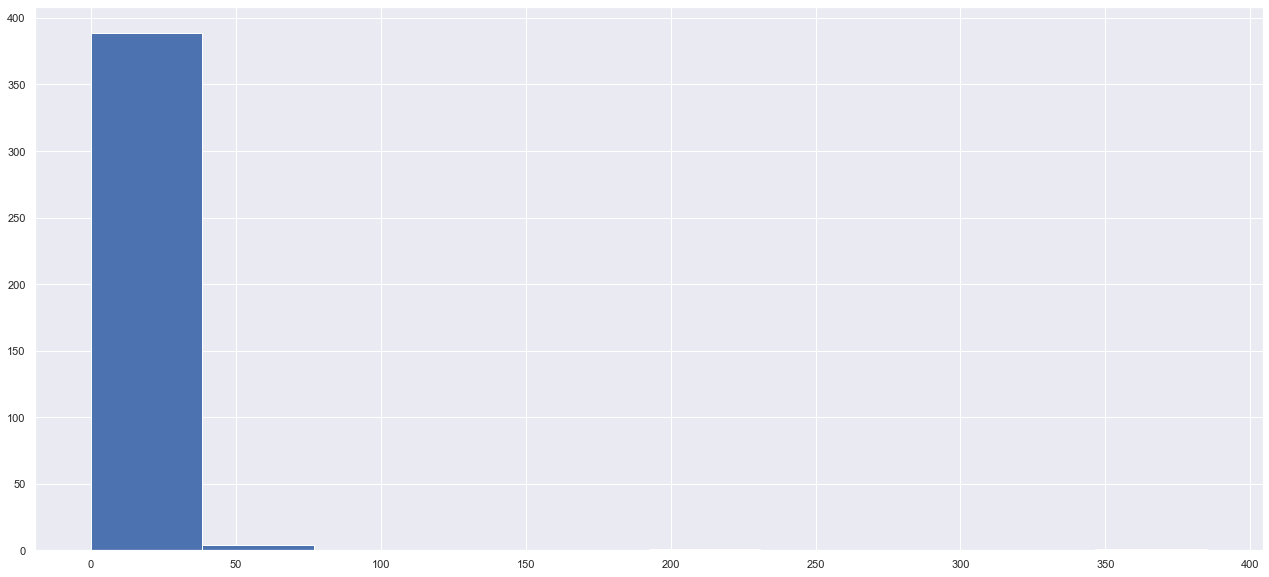

In [175]:
stud_math.absences = stud_math.absences.astype('float64')
print(stud_math.absences.describe())
stud_math.absences.hist(figsize=(22, 10))

In [176]:
# Нахождение выбрасов

perc_25 = stud_math.absences.quantile(0.25)
perc_75 = stud_math.absences.quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: 0.0
75-ый перцентль: 8.0
Границы выбрасов: [-12.0, 20.0]


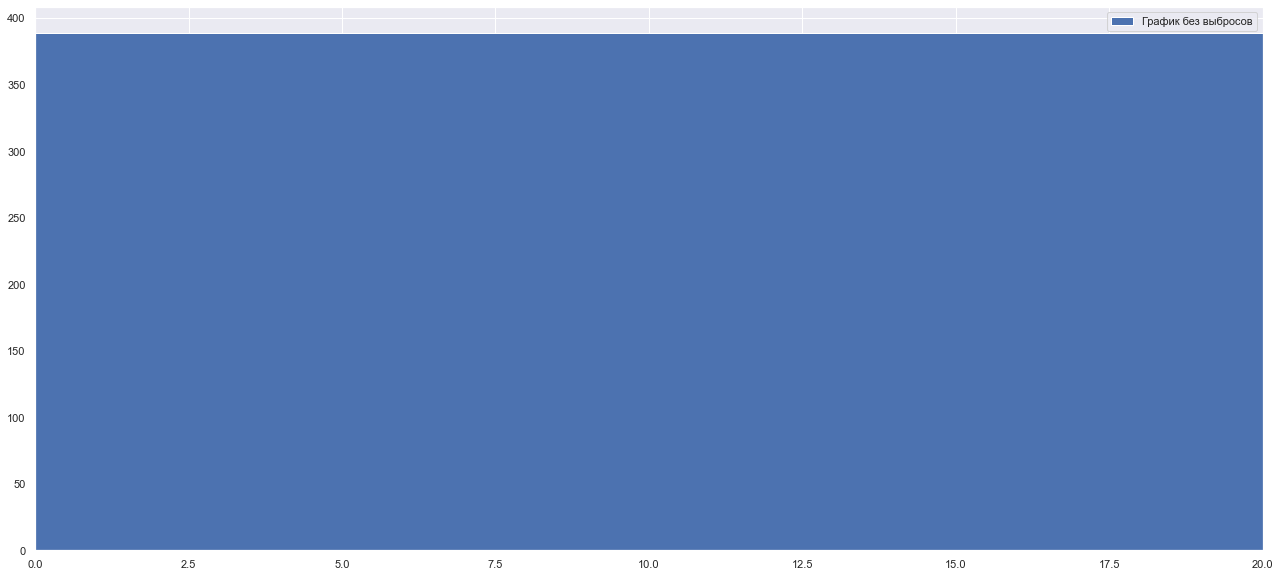

In [197]:
# График без выбрасов
stud_math.absences.hist(label='График без выбросов', figsize=(22, 10))
plt.xlim(0, 20.0)
plt.legend()

### В основном 0-20 пропускают занятий

## Работа с колонкой score

### Заполнение пропусков

In [180]:
stud_math.score = stud_math.score.astype(str).apply(
    lambda x: None if x.strip() == '' else x)

In [181]:
stud_math.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
40.0     31
60.0     31
65.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
nan       6
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

In [182]:
stud_math.score = stud_math.score.replace(
    'nan', str(stud_math.score.median()))

In [183]:
stud_math.score.value_counts()

50.0     54
55.0     52
0.0      37
75.0     33
40.0     31
60.0     31
65.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

### Работа с графиком

count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


<AxesSubplot:>

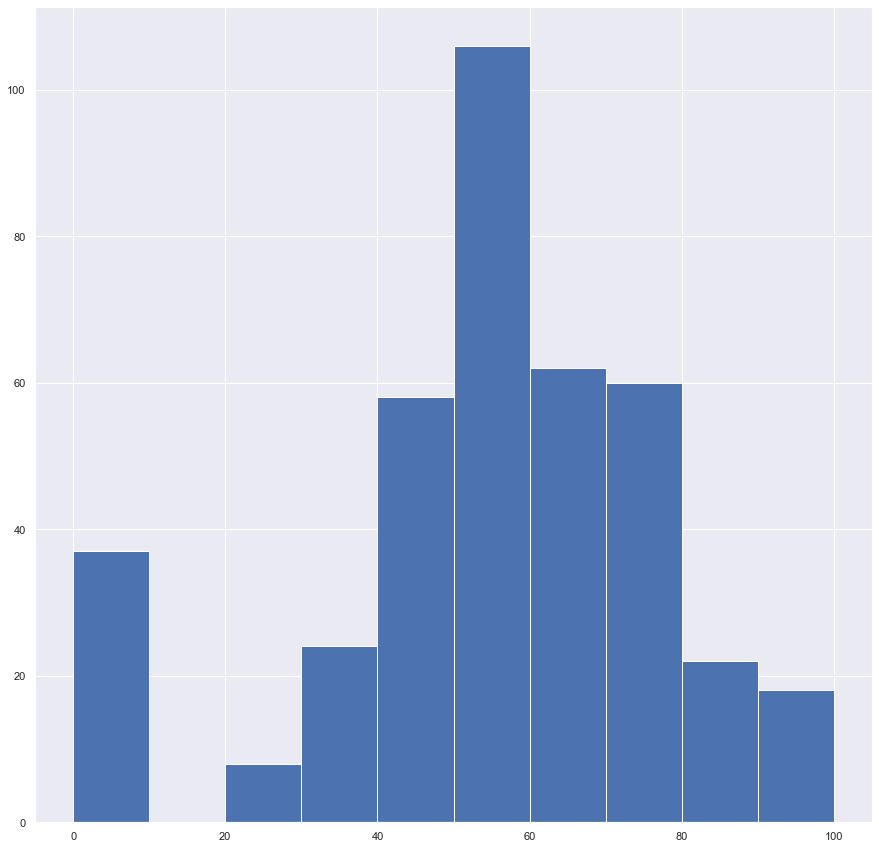

In [184]:
stud_math.score = stud_math.score.astype('float64')
print(stud_math.score.describe())
stud_math.score.hist(figsize=(15, 15))

In [185]:
# Нахождение выбрасов

perc_25 = stud_math.score.quantile(0.25)
perc_75 = stud_math.score.quantile(0.75)
IQR = perc_75 - perc_25

print('25-ый перцентль: {}'.format(perc_25) +
      '\n'+'75-ый перцентль: {}'.format(perc_75))
print('Границы выбрасов:', [perc_25-1.5*IQR, perc_75+1.5*IQR])

25-ый перцентль: 40.0
75-ый перцентль: 70.0
Границы выбрасов: [-5.0, 115.0]


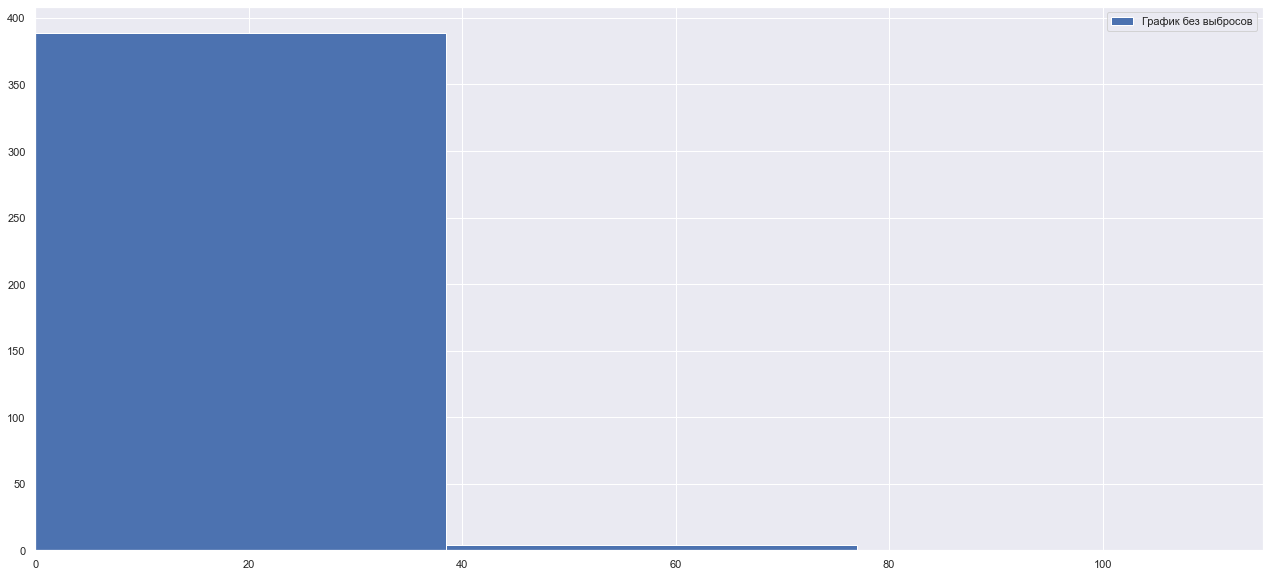

In [201]:
# График без выбрасов
stud_math.absences.hist(label='График без выбросов', figsize=(22, 10))
plt.xlim(0, 115.0)
plt.legend()

### Большая часть получила по экзамену от 0-39

In [187]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.132064,0.084755,-0.015355,0.228081,0.015355,0.066693,0.026443,0.134069,-0.063892,0.091531,-0.151150
Medu,-0.161375,1.000000,0.262065,-0.160877,0.077050,-0.245110,-0.077050,-0.009605,0.026210,0.063361,-0.050991,-0.010979,0.205568
Fedu,-0.132064,0.262065,1.000000,0.039862,0.052459,-0.146472,-0.052459,0.039657,-0.067393,-0.022996,0.016871,0.004668,0.074467
traveltime,0.084755,-0.160877,0.039862,1.000000,-0.094637,0.049670,0.094637,-0.015151,-0.012496,0.051775,-0.044842,-0.038511,-0.055243
studytime,-0.015355,0.077050,0.052459,-0.094637,1.000000,-0.166598,-1.000000,0.043739,-0.119014,-0.051090,-0.073674,-0.025619,0.114371
failures,0.228081,-0.245110,-0.146472,0.049670,-0.166598,1.000000,0.166598,-0.029921,0.094826,0.113649,0.075849,0.055245,-0.326532
"studytime, granular",0.015355,-0.077050,-0.052459,0.094637,-1.000000,0.166598,1.000000,-0.043739,0.119014,0.051090,0.073674,0.025619,-0.114371
famrel,0.066693,-0.009605,0.039657,-0.015151,0.043739,-0.029921,-0.043739,1.000000,0.168225,0.078006,0.077776,-0.079609,0.055223
freetime,0.026443,0.026210,-0.067393,-0.012496,-0.119014,0.094826,0.119014,0.168225,1.000000,0.292305,0.060557,0.006943,0.018200
goout,0.134069,0.063361,-0.022996,0.051775,-0.051090,0.113649,0.051090,0.078006,0.292305,1.000000,-0.014274,-0.049745,-0.125708


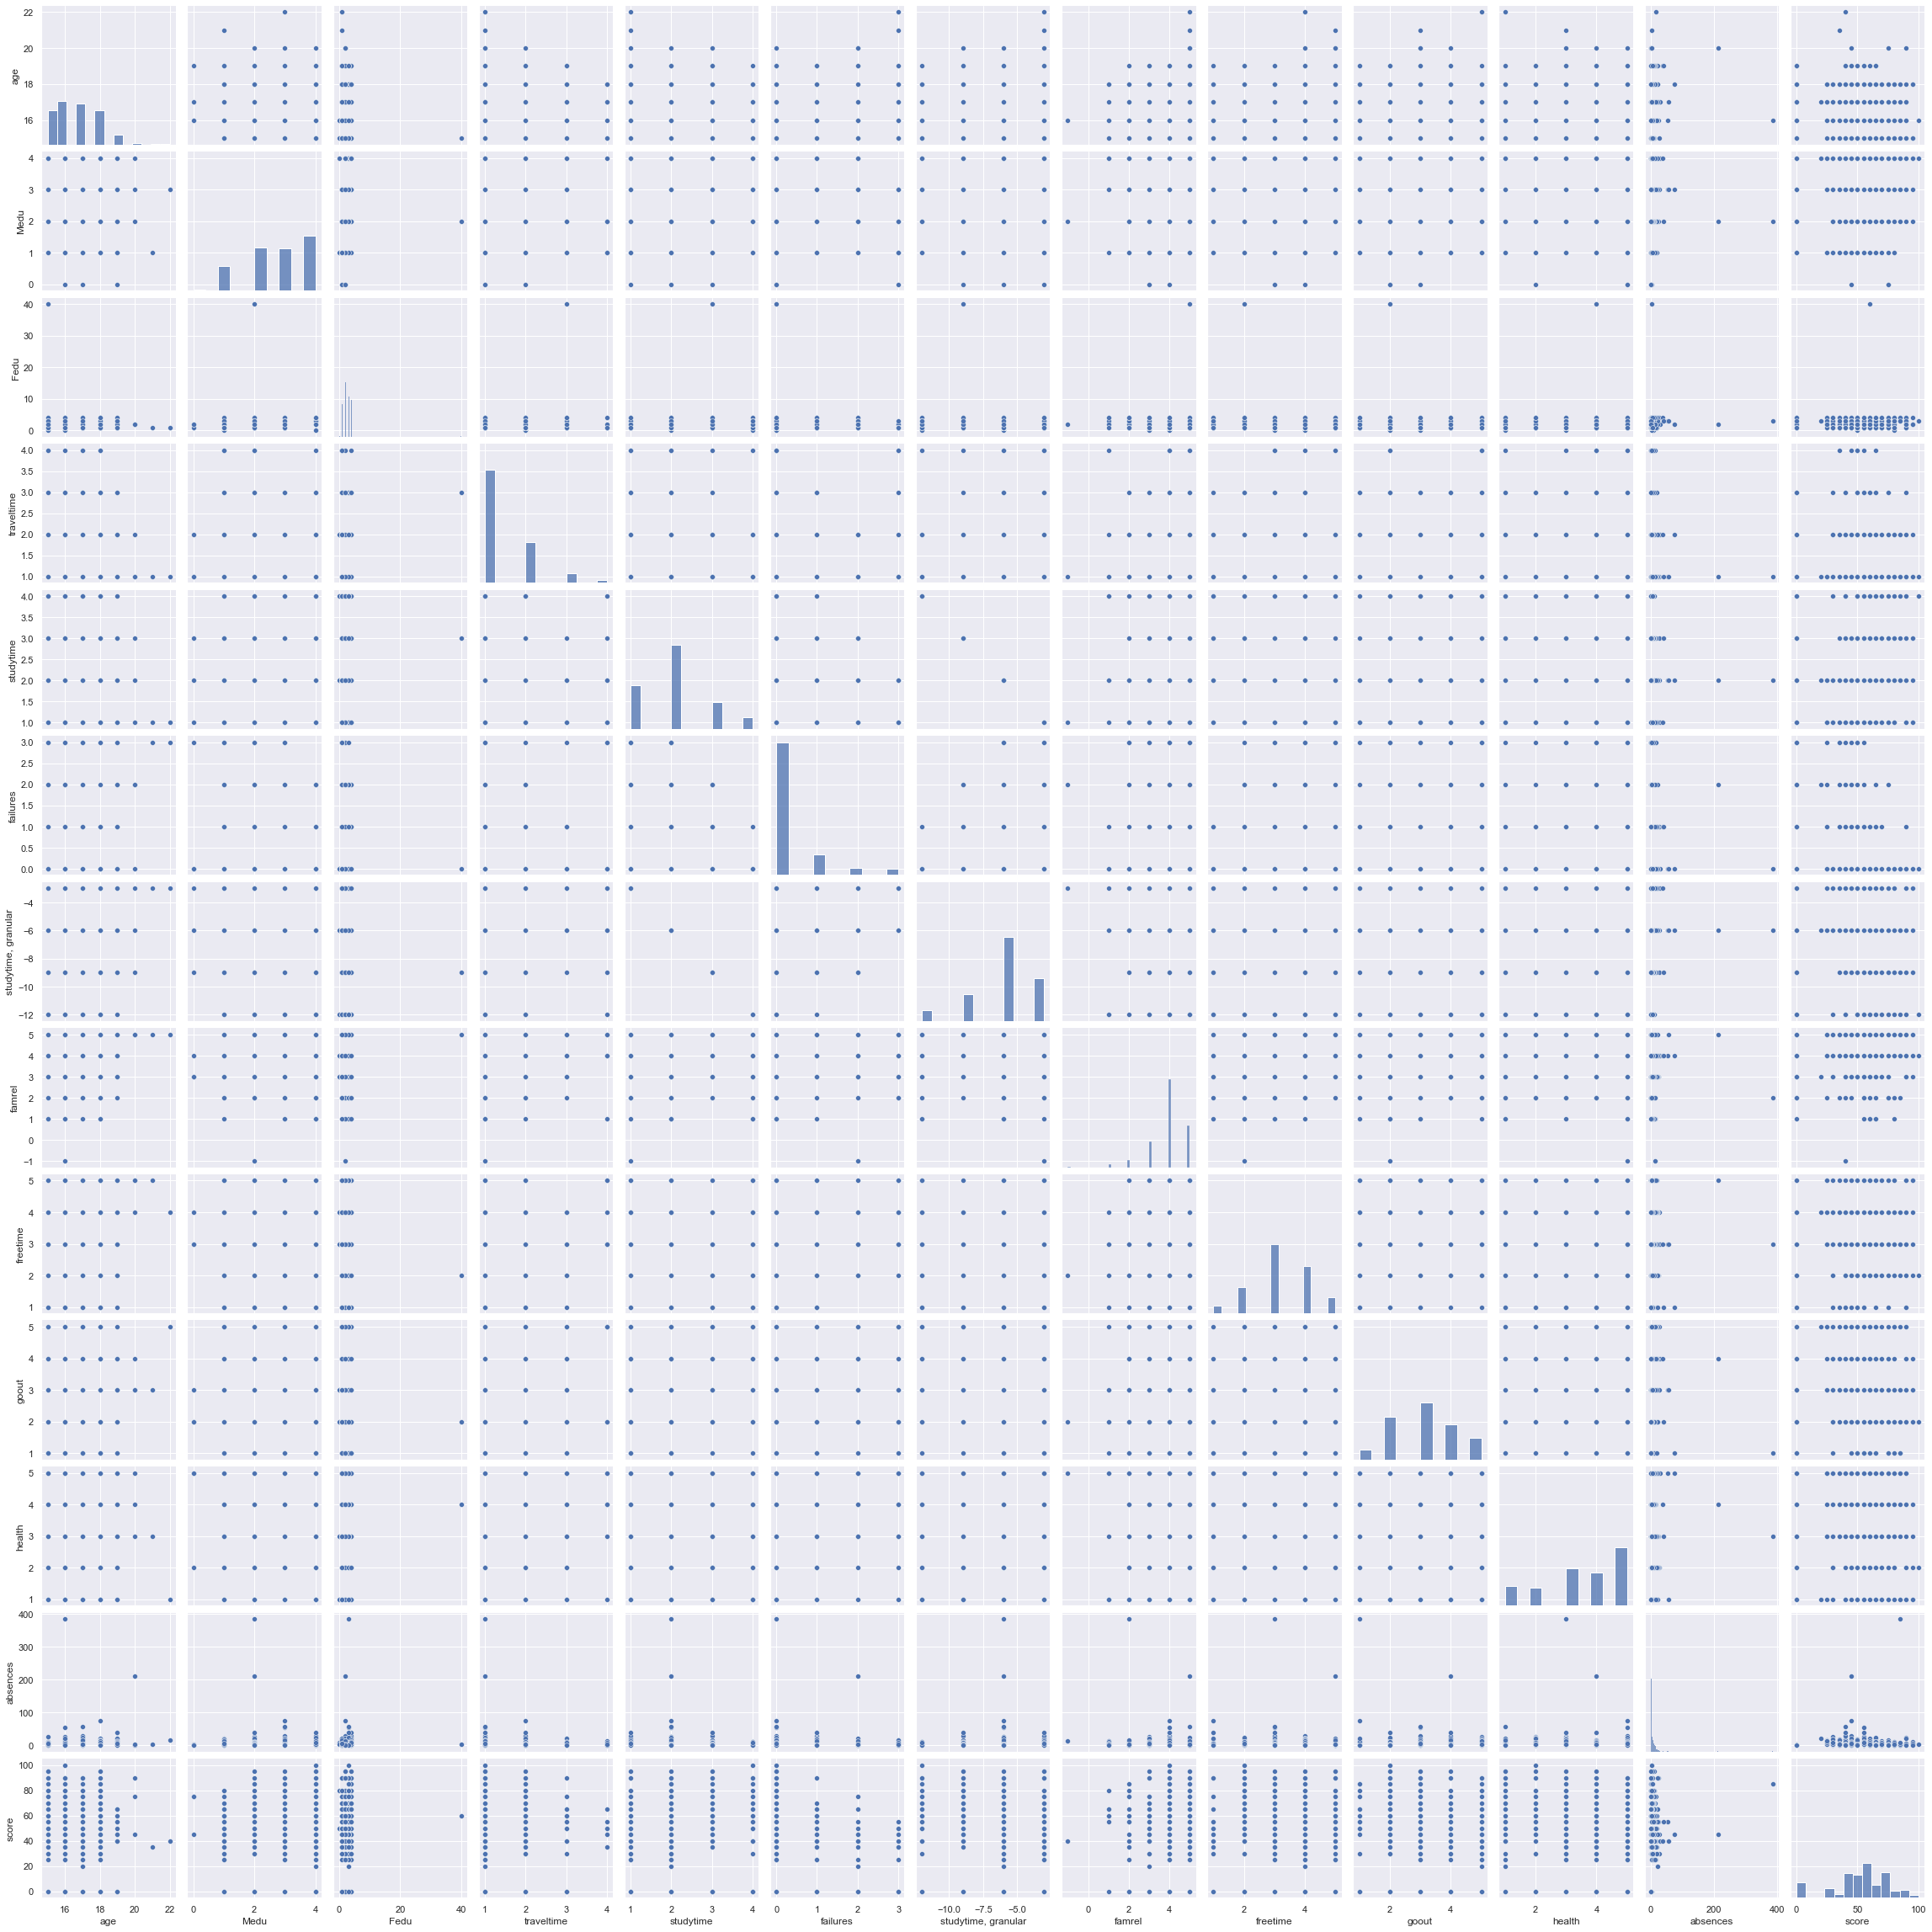

In [188]:
sns.pairplot(data=stud_math)

### Итог под ДФ:
#### Нужно акцентировать внимание на улучшение образования:


#### Загородных учеников
#### На учеников обучающихся в MS школах
#### На представителей мужского пола
#### На учеников живуших в семье меньше 3 человек и раздельно живущих
#### Стараться повысить показатель у студентов возраста 15 лет(возможно преподовать предмет достаточно интереснее не однообразно)
#### На учеников,которые добераются 30-60 минут
#### На студентов у которых мамы не имеют образование
#### Сделать акцент на студентов с низким показателем внеучебных неудач(на проблемных детей)
#### На студентов обучающихся дополнительно дома или необучающихся дополнительно в школе 
#### Которые не хотят получить высшее образование в дальнейшем
#### На тех у кого нет интернета
#### Состоящих в романтических отношениях
#### Не имеющих свободное время и с друзьями
#### На студентов с плохим здоровьем
#### Пропускающих больше 20 занятий
#### Получивших баллы меньше 40